In [1]:
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [2]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

In [3]:
mnist = fetch_openml('mnist_784', version=1)

In [4]:
X = mnist.data

In [5]:
X = X.reshape(70000, 28, 28, 1)

In [6]:
y = np.array(mnist.target)
y=y.astype(int)

In [7]:
#scaler.fit(X)
#scaled = scaler.transform(X)

In [8]:
def cnn_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compile model
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [9]:
cnn = cnn_model()
cnn.fit(X, y)

2188/2188 [==============================] - 83s 37ms/step - loss: 20.1948 - accuracy: 0.7875


## Réaliser l'interface graphique

Importer les modules nécéssaires :

In [10]:
from tkinter import *
import tkinter as tk
import win32gui
from PIL import ImageGrab, Image
import matplotlib.pyplot as plt

La fonction de prédiction du chiffre :

In [11]:
def predict_digit(img):
    #Changer la taille de l'image à 28x28 pixels
    img = img.resize((28,28))
    #Convertir l'image en grayscale
    img = img.convert('L')
    img = np.array(img)
    #Normaliser l'image et la montrer en console
    img = img*(-1) + 255
    plt.imshow(img, cmap="binary")
    plt.axis("off")
    plt.show()
    #transformer l'image en array à une dimension pour la prédiction
    img = img.reshape(1, 28, 28, 1)
    #prédire la classe
    res = cnn.predict([img])
    res1 = np.argmax(res)
    print(res)
    print(res1)
    return res1

Créer l'interface Tkinter :

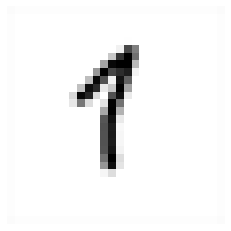

[[0.07841723 0.0605737  0.09280289 0.07835902 0.10572469 0.08518586
  0.07085264 0.05947927 0.2715552  0.09704945]]
8


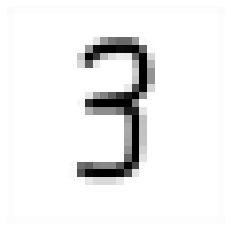

[[1.2324284e-07 1.4852506e-05 6.7846407e-04 9.0233463e-01 4.0093346e-09
  7.2038375e-02 2.3628719e-09 1.9182269e-02 4.3781647e-03 1.3731006e-03]]
3


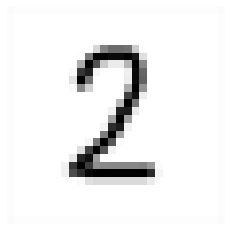

[[4.59665346e-13 4.63327044e-04 9.99536514e-01 2.01511853e-07
  3.95273495e-13 1.58883727e-16 1.08476426e-13 5.73672054e-10
  4.54295837e-11 5.48408263e-28]]
2


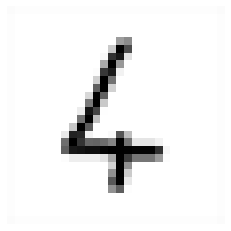

[[0.08828427 0.05848566 0.0962261  0.10169387 0.10520752 0.0770141
  0.0885847  0.07566123 0.19665672 0.11218584]]
8


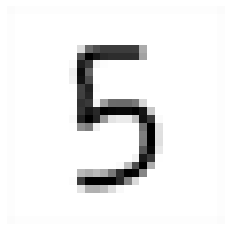

[[2.0972610e-29 3.5121613e-27 0.0000000e+00 1.2977400e-06 0.0000000e+00
  9.9999678e-01 1.8804806e-06 0.0000000e+00 3.4926609e-16 3.6787973e-23]]
5


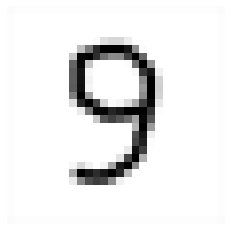

[[0.05137755 0.05581836 0.07299445 0.03744227 0.09111036 0.09084218
  0.0367799  0.0297135  0.47395927 0.05996214]]
8


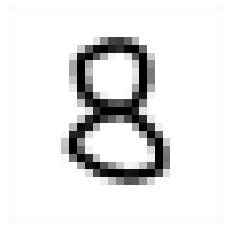

[[1.2959829e-05 3.2632239e-04 9.9194374e-05 5.1510801e-07 2.8725216e-04
  2.0400712e-03 1.0857249e-06 6.1585837e-07 9.9722326e-01 8.8089064e-06]]
8


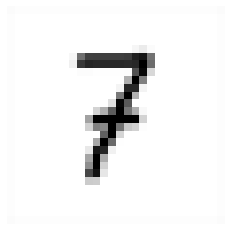

[[0.08828427 0.05848566 0.0962261  0.10169387 0.10520752 0.0770141
  0.0885847  0.07566123 0.19665672 0.11218584]]
8


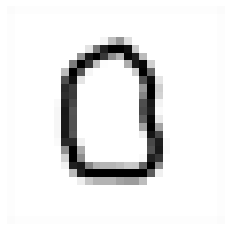

[[9.9999976e-01 2.1365283e-14 1.5158580e-14 5.4681984e-12 8.1205892e-10
  1.9158204e-08 2.0171910e-07 4.3567872e-11 3.9125322e-08 1.9141564e-14]]
0


In [13]:
class App(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)

        self.x = self.y = 0

        # Créer les éléments
        self.canvas = tk.Canvas(self, width=300, height=300, bg = "white", cursor="cross")
        self.label = tk.Label(self, text="Dessinez un chiffre à droite...", font=("Helvetica", 48))
        self.classify_btn = tk.Button(self, text = "Identifier", command = self.classify_handwriting) 
        self.button_clear = tk.Button(self, text = "Effacer", command = self.clear_all)

        # Créer la grille
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.label.grid(row=0, column=1,pady=2, padx=2)
        self.classify_btn.grid(row=1, column=1, pady=2, padx=2)
        self.button_clear.grid(row=1, column=0, pady=2)

        #Associer la fonction de dessin au bouton gauche de la souris
        self.canvas.bind("<B1-Motion>", self.draw_lines)

    def clear_all(self):
        self.canvas.delete("all")

    def classify_handwriting(self):
        #Récupérer les informations de l'image et les convertir
        HWND = self.canvas.winfo_id()
        rect = win32gui.GetWindowRect(HWND)
        im = ImageGrab.grab(rect)

        #Utiliser la fonction de prédiction
        digit = predict_digit(im)
        digit = str(digit)
        self.label.configure(text= str(f"Le chiffre\nest : {digit}."))

    def draw_lines(self, event):
        #Dessiner en créant des ovales noirs de rayon de 8 pixels
        self.x = event.x
        self.y = event.y
        r=8
        self.canvas.create_oval(self.x-r, self.y-r, self.x + r, self.y + r, fill='black')

#Appeler la fonction
App()
mainloop()

Le modèle CNN fonctionne même s'il identifie trop souvent les chiffres comme étant des 8.